In [54]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/IT_customer_churn35a.csv')
data.head()

gender  Dependents  tenure  OnlineSecurity  OnlineBackup  TechSupport  \
0       0           0       1               0             2            0   
1       1           0      34               2             0            0   
2       1           0       2               2             2            0   
3       1           0      45               2             0            2   
4       0           0       2               0             0            0   

   Contract  PaperlessBilling  MonthlyCharges  Churn  
0         0                 1           29.85      0  
1         1                 0           56.95      0  
2         0                 1           53.85      1  
3         1                 0           42.30      0  
4         0                 1           70.70      1

In [74]:


# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Display the encoded dataset
print(X)
print(y)


      gender  Dependents  tenure  OnlineSecurity  OnlineBackup  TechSupport  \
0          0           0       1               0             2            0   
1          1           0      34               2             0            0   
2          1           0       2               2             2            0   
3          1           0      45               2             0            2   
4          0           0       2               0             0            0   
...      ...         ...     ...             ...           ...          ...   
7038       1           1      24               2             0            2   
7039       0           1      72               0             2            0   
7040       0           1      11               2             0            0   
7041       1           0       4               0             0            0   
7042       1           0      66               2             0            2   

      Contract  PaperlessBilling  MonthlyCharges  


In [78]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [79]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.8119233498935415
Precision: 0.6708860759493671
Recall: 0.5683646112600537
F1-score: 0.6153846153846155
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.80      0.81      0.81      1409



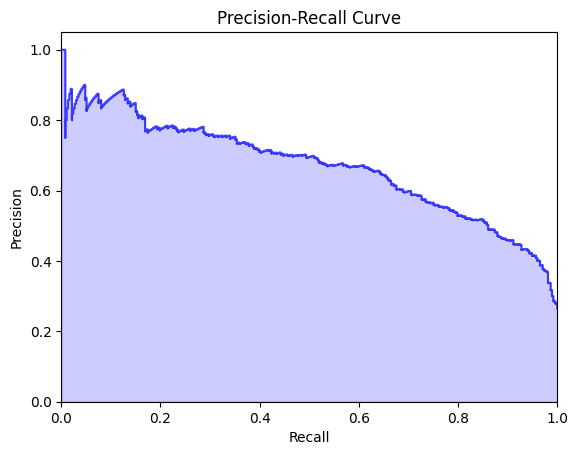

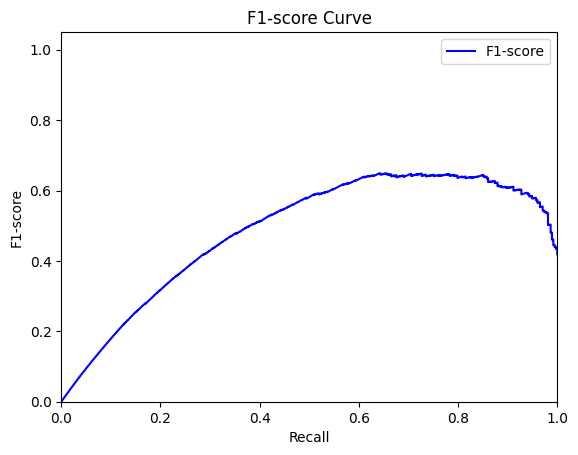

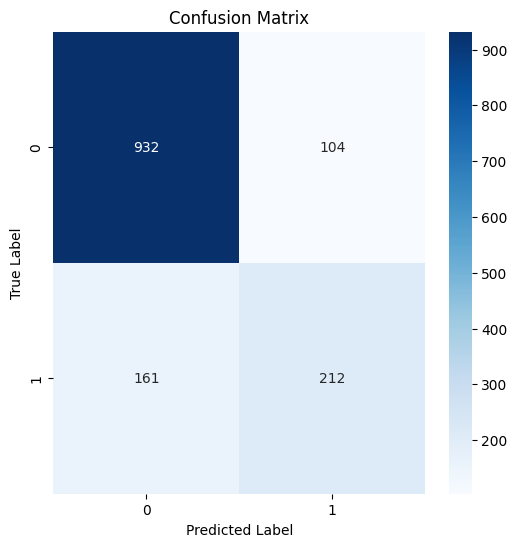

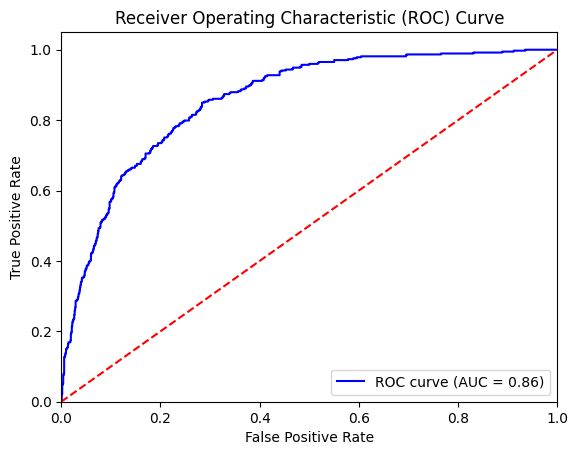

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier with hyperparameters
logistic_regression = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)  # Adjust parameters as needed

# Train the model
logistic_regression.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = logistic_regression.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = logistic_regression.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
